# Project: Investigate TMDb Movie Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

I've chosen to analyse TMDb Movie dataset. The datset has a collection of 10,864 movies with budget, revenue, ratings and other features. The collection has movies starting from 1960 to 2015 spaning over decades.

I will be exploring,
  1. Budget and revenue trend over years. Movies with highest & lowest budget & revenue.
  2. Popular genres from decade to decade.
  3. Properties associated with movies with high revenue.

In [2]:
# Importing libraries that I will use.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### Data import and explore general properties

In [3]:
# Load TMDb Movies dataset
df = pd.read_csv("tmdb-movies.csv")

In [4]:
# Take a look at the dataset.
df.head(4)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09


In [5]:
# Check for null rows in each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [9]:
# Check if the dataset has any duplicate entries
df.duplicated().sum()

1

In [10]:
# Describe the dataset to see basic statistics of numerical columns.
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Dataset summary after exploring general properties
1. There are null values in imdb_id, cast, homepage, director, tagline, keywords, overview, genres and production_companies columns. 
2. No information about which currency is used to calculate budget and revenue, although budget_adj and revenue_adj are given to be in US dollars. I will assume that the budget and revenue are in US dollars as well.
3. id and imdb_id would be useful if there were other datasets with more columns to combine. since we can't make use of them, I will drop them.
4. There are a few null rows in cast, director and genres columns. In order to avoid dealing with null category when I group them, I'll drop rows with null values.
5. Since I don't see any use for homepage, tagline and overview columns, I will drop them as well.
6. There is one duplicate entry in the dataset that needs to be removed.
7. There is no explation for how the polularity has been calcuated. It seems to start from 0.000065 and go all the way upto 32.98. 


### Data Cleaning
In this section, lets clean the dataset so that it is ready to be analysed.

In [4]:
# Drop id, imdb_id, homepage, tagline, overview columns
df.drop(['id','imdb_id','homepage','tagline','overview'], axis=1, inplace=True)

In [5]:
# Drop the duplicate row.
df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

In [6]:
# Since there are a few null rows in cast, director and genres, I'll drop them. 
df.dropna(subset=['cast','director','genres'],how='any',inplace=True)
df.isna().sum()

popularity                 0
budget                     0
revenue                    0
original_title             0
cast                       0
director                   0
keywords                1425
runtime                    0
genres                     0
production_companies     959
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [29]:
# Check if budget, budget_adj, revenue, revenue_adj and runtime have zero values, because zeros will produce wrong statistics such as mean, median, standard deviation.
df['revenue'].value_counts().head(2)
#df['revenue'].sort_values().value_counts().head(10)

0           5888
12000000      10
Name: revenue, dtype: int64

In [7]:
df['revenue_adj'] = df['revenue_adj'].apply(lambda x: '{:.0f}'.format(x))
df['revenue_adj'].value_counts().head(10)

0            5888
9               3
10              2
89906740        2
26331570        2
117753431       2
29106404        2
81036423        2
57667591        2
15              2
Name: revenue_adj, dtype: int64

In [8]:
df['budget_adj'] = df['budget_adj'].apply(lambda x: '{:.0f}'.format(x))
df['budget_adj'].value_counts().head(10)

0           5578
21033372      17
10164004      17
20000000      16
4605455       15
33496899      14
24234951      14
20328009      13
20255733      13
26291715      13
Name: budget_adj, dtype: int64

Check datatypes of each columns and change the types if needed to aid in calculations.

In [9]:
# Check the datatypes of each columns.
df.dtypes

popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
director                 object
keywords                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj               object
revenue_adj              object
dtype: object

In [10]:
# Change datatypes of budget_adj and revenue_adj to float.
df = df.astype({'budget_adj': 'float64','revenue_adj': 'float64'})

Replace zeros with NaN in budget, revenue, budget_adj and revenue_adj columns.

In [11]:
# Replace zeros with NaN values in budget, revenue, budget_adj and revenue_adj columns.
df['budget'] = df['budget'].replace(0,np.NaN)
df['revenue'] = df['revenue'].replace(0,np.NaN)
df['budget_adj'] = df['budget_adj'].replace(0,np.NaN)
df['revenue_adj'] = df['revenue_adj'].replace(0,np.NaN)
df['runtime'] = df['runtime'].replace(0,np.NaN)

In [12]:
# Change the datatype of release_date column to datetime.
df['release_date'] = pd.to_datetime(df['release_date'])
df['release_date'].head()

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

In [68]:
# Check the result of data cleaning steps.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10731 entries, 0 to 10865
Data columns (total 16 columns):
popularity              10731 non-null float64
budget                  5153 non-null float64
revenue                 4843 non-null float64
original_title          10731 non-null object
cast                    10731 non-null object
director                10731 non-null object
keywords                9306 non-null object
runtime                 10703 non-null float64
genres                  10731 non-null object
production_companies    9772 non-null object
release_date            10731 non-null datetime64[ns]
vote_count              10731 non-null int64
vote_average            10731 non-null float64
release_year            10731 non-null int64
budget_adj              5153 non-null float64
revenue_adj             4843 non-null float64
dtypes: datetime64[ns](1), float64(7), int64(2), object(6)
memory usage: 1.4+ MB


There are a winde range of movies released from 1960 to 2015, spanning over 6 decades. This is interesting to think about how popular casts, directors, genres, budget allocated change over decades. I'll keep this in mind in further analysis.

In [95]:
# There is a wide range of movies released from 1960 to 2015
df['release_year'].sort_values().unique()

array([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015])

In [66]:
df.head(5)

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,137999939.0,1.392446e+09
1,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,137999939.0,3.481613e+08
2,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,101199955.0,2.716190e+08
3,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,183999919.0,1.902723e+09
4,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,174799923.0,1.385749e+09


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 : How do budget and revenue trend look over years?. Which movies have highest & lowest budget & revenue numbers?

#### a. First, lets look at the highest/lowest budget & revenue movies.

In [124]:
# Find out a movie with highest budget produced between 1960 and 2015.
df[['original_title','cast','director','release_date','budget','revenue']][df.budget == df.budget.max()]

,original_title,cast,director,release_date,budget,revenue
2244,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Sngmoo Lee,2010-12-02,425000000.0,11087569.0


In [125]:
# Find out a movie with lowest budget produced between 1960 and 2015.
df[['original_title','cast','director','release_date','budget','revenue']][df.budget == df.budget.min()]

,original_title,cast,director,release_date,budget,revenue
1151,Fear Clinic,Thomas Dekker|Robert Englund|Cleopatra Coleman...,Robert Hall,2014-10-31,1.0,NaN
2618,Lost & Found,David Spade|Sophie Marceau|Ever Carradine|Step...,Jeff Pollack,1999-04-23,1.0,100.0
3065,"Angus, Thongs and Perfect Snogging",Georgia Groome|Eleanor Tomlinson|Aaron Taylor-...,Gurinder Chadha,2008-07-25,1.0,NaN
3581,"Love, Wedding, Marriage",Mandy Moore|Kellan Lutz|Jessica Szohr|Autumn F...,Dermot Mulroney,2011-06-03,1.0,1378.0


In [126]:
# Find out a movie with highest revenue produced between 1960 and 2015.
df[['original_title','cast','director','release_date','budget','revenue']][df.revenue == df.revenue.max()]

,original_title,cast,director,release_date,budget,revenue
1386,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,2009-12-10,237000000.0,2.781506e+09


In [127]:
# Find out a movie with lowest revenue produced between 1960 and 2015.
df[['original_title','cast','director','release_date','budget','revenue']][df.revenue == df.revenue.min()]

,original_title,cast,director,release_date,budget,revenue
5067,Shattered Glass,Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...,Billy Ray,2003-11-14,6000000.0,2.0
8142,Mallrats,Jason Lee|Jeremy London|Shannen Doherty|Claire...,Kevin Smith,1995-10-20,6000000.0,2.0


By analysing highest & lowest budget & revenue, we can observe that the Warrior's way movie was made with 
a budget of \\$425M while it made a revenue of \\$11M. However, a quick Google search shows that the movie was made with 
a budget of \\$40M and it made a revenue of \\$11M. This shows that there might be more inconsistent budget 
data in the dataset.

Avatar was made with a budget of \\$237M, while it made a whopping \\$2.7B. 

When we look at the movies with lowest budget & revenue and compare them with Google search results, data 
inconsistency is more apparent. 

#### b. Now, lets see the budget and revenue evolution over years. It would also be interesting to see the difference between budget & budget_adj and revenue & revenue_adj numbers.

Text(0,0.5,'Budget & Revenue (in x10 Billion $)')

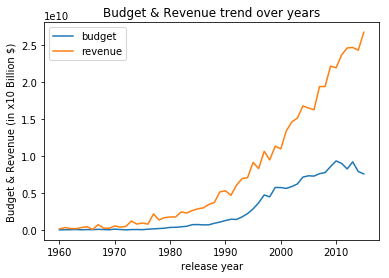

In [16]:
# Plot budget & revenue evolution over years.
year_bud_rev = df.groupby('release_year')['budget','revenue'].sum()
year_bud_rev.plot(title='Budget & Revenue trend over years')

plt.xlabel('release year',fontsize=10)
plt.ylabel('Budget & Revenue (in x10 Billion $)',fontsize=10)

Text(0,0.5,'Budget & Revenue (in x10 Billion $)')

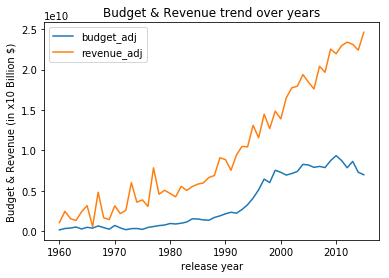

In [17]:
# Lets plot budget_adj & revenue_adj evolution over years.
year_bud_rev_adj = df.groupby('release_year')['budget_adj','revenue_adj'].sum()
year_bud_rev_adj.plot(title='Budget & Revenue trend over years')
plt.xlabel('release year',fontsize=10)
plt.ylabel('Budget & Revenue (in x10 Billion $)',fontsize=10)

From the above evolution graphs, we see that the Revenue & Budget were constant in the 60s. Since 70s, the gap between Budget & Revenue widened with revenue increasing higher than the budget. So, from the data it looks like the movies are bringing in more revenues decades after decades. Lets smoothen the curve by looking at the evolution per decade in below graph.

In [18]:
year_bud_rev.sort_values(by=['release_year'], ascending=True).head(10)

,budget,revenue
release_year,,
1960,22056948.0,145005000.0
1961,46137000.0,337720188.0
1962,54722126.0,215579846.0
1963,73331500.0,187404989.0
1964,39483161.0,340981782.0
1965,70205115.0,458081854.0
1966,57554800.0,84736689.0
1967,100652000.0,737834637.0
1968,71939000.0,264732980.0


Text(0,0.5,'Budget & Revenue (in x100 Billion $)')

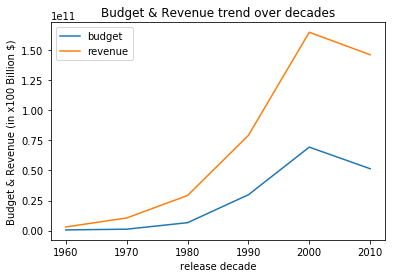

In [19]:
# Plot budget & revenue evolution per decade.
year_bud_rev_decade = year_bud_rev.groupby((year_bud_rev.index//10)*10).sum()
year_bud_rev_decade.plot(title='Budget & Revenue trend over decades')
plt.xlabel('release decade',fontsize=10)
plt.ylabel('Budget & Revenue (in x100 Billion $)',fontsize=10)

In [23]:
year_bud_rev_decade

,budget,revenue
release_year,,
1960,5.782107e+08,3.016035e+09
1970,1.185219e+09,1.049004e+10
1980,6.587587e+09,2.918931e+10
1990,2.977166e+10,7.912239e+10
2000,6.933998e+10,1.647696e+11
2010,5.139526e+10,1.460854e+11


From the above analysis, we know that the budget & revenue increased over decades. 
Now, lets look if there is any relation between percentage change of budget and revenue.

Text(0,0.5,'Budget & Revenue %age change')

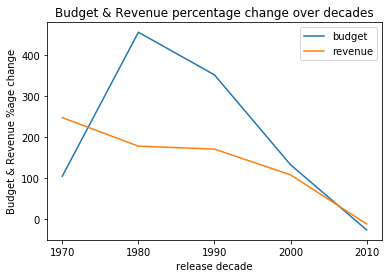

In [21]:
# Plot percentage change in budget & revenue per decade.
year_bud_rev_decade_pc_change = (year_bud_rev_decade.pct_change())*100
year_bud_rev_decade_pc_change.plot(title='Budget & Revenue percentage change over decades')
plt.xticks(np.arange(1970, 2020, 10))
plt.xlabel('release decade',fontsize=10)
plt.ylabel('Budget & Revenue %age change',fontsize=10)

Now, this chart is interesting and there is no clear trend.
From 60s to 70s, the revenue %age increase is more than the budget. But from decades 70s to 00s, budget increase is way more the revenue. In 2010s the trend seems to be reversing.

### Research Question 2 : Which Genres are most popular from year to year?

In [11]:
# Make a function to split the words and count genre, cast, keywords, production_companies columns

def count_words(x):
    # Concatenate all the rows of the genrs.
    data_plot = df[x].str.cat(sep = '|')
    data = pd.Series(data_plot.split('|'))
    # Count each of the genre and return.
    info = data.value_counts(ascending=False)
    return info

top_genres = count_words('genres')

Text(0,0.5,'Genres')

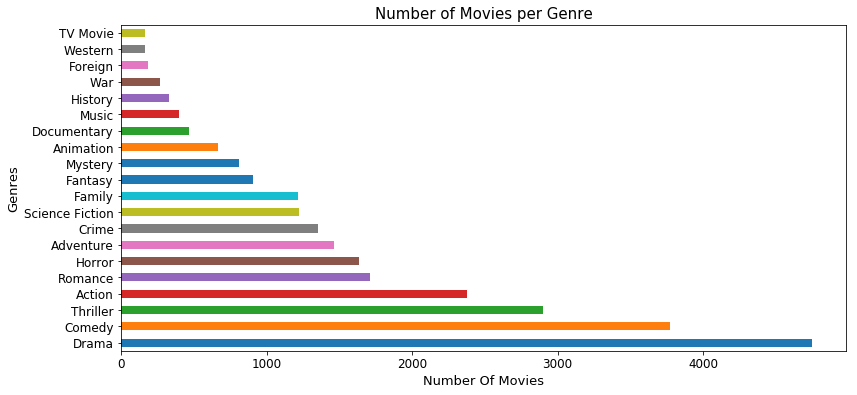

In [15]:
# Plot the number of movies per genre.
top_genres.plot(kind= 'barh',figsize = (13,6),fontsize=12)

#setup the title and the labels of the plot.
plt.title("Number of Movies per Genre",fontsize=15)
plt.xlabel('Number Of Movies',fontsize=13)
plt.ylabel("Genres",fontsize= 13)

From 1960 to 2015, the top genres are Drama, Comedy, Thriller, Action & Romance. In the below analysis, lets look 
at the top genre per year.

In [19]:
# Create a list of all elements of genre column.
genre_list = list(map(str,(df['genres'])))
genre = ['Adventure', 'Science Fiction', 'Fantasy', 'Crime', 'Western', 'Family', 'Animation','War','Mystery','Romance','TV Movie','Action', 'Thriller','Comedy','Drama' , 'History', 'Music', 'Horror', 'Documentary', 'Foreign']

# Make the numpy array of year which contain all the rows of release_year column. 
year = np.array(df['release_year'])

# Make a null dataframe whose index is genres and columns are years.
genre_count_df = pd.DataFrame(index = range(1960, 2016), columns = genre)
#change all the values of the dataframe from NAN to zero.
genre_count_df = genre_count_df.fillna(value = 0.0)

# Loop over genre_list and fill genre_count_df with the number of times each genre appears per year.
x = 0
for i in genre_list:
    split_genre = list(map(str,i.split('|')))
    genre_count_df.loc[year[x], split_genre] = genre_count_df.loc[year[x], split_genre] + 1
    x+=1

In [25]:
# Lets examine the dataframe for correct values.
genre_count_df.head(3)

,Adventure,Science Fiction,Fantasy,Crime,Western,Family,Animation,War,Mystery,Romance,TV Movie,Action,Thriller,Comedy,Drama,History,Music,Horror,Documentary,Foreign
1960,5.0,3.0,2.0,2.0,6.0,3.0,0.0,2.0,0.0,6.0,0.0,8.0,6.0,8.0,13.0,5.0,1.0,7.0,0.0,1.0
1961,6.0,4.0,2.0,2.0,3.0,5.0,1.0,2.0,1.0,7.0,0.0,7.0,0.0,10.0,16.0,3.0,2.0,3.0,0.0,1.0
1962,7.0,2.0,1.0,3.0,3.0,2.0,0.0,3.0,4.0,5.0,0.0,8.0,7.0,5.0,21.0,4.0,1.0,5.0,0.0,1.0


In [22]:
# Make a dataframe with top genre per year and the number of movies made with each genre.
most_popular_genre_by_year = pd.DataFrame([genre_count_df.idxmax(axis = 1).values,
                                          genre_count_df.apply( max, axis=1 ).values],
                                          columns = genre_count_df.index,
                                         index = ["genre", 'counts'])

In [23]:
# Display the data frame.
most_popular_genre_by_year

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
genre,Drama,Drama,Drama,Comedy,Drama,Drama,Comedy,Comedy,Drama,Drama,...,Drama,Drama,Drama,Drama,Drama,Drama,Drama,Drama,Drama,Drama
counts,13,16,21,13,20,20,16,17,19,13,...,196,197,232,222,208,213,231,253,284,260


### Research Question 3 : What kind of properties are associated with movies with high revenue?

In [25]:
# Create revenue categories using describe function.
df['revenue_ranges'] = pd.cut(df['revenue'], df['revenue'].describe()[3:8], labels = ['Low', 'Medium', 'Moderately High', 'High'])

In [26]:
# Lets see the median revenue per category
df.groupby('revenue_ranges')['revenue'].median()

revenue_ranges
Low                  1429299.0
Medium              17425000.0
Moderately High     55347924.5
High               195312802.0
Name: revenue, dtype: float64

In [27]:
# Lets see the median revenue per category
df.groupby('revenue_ranges')['budget'].median()

revenue_ranges
Low                 6000000.0
Medium             15000000.0
Moderately High    25000000.0
High               60000000.0
Name: budget, dtype: float64

Since popular actors, directors, genre and other aspects of movies change from decade to decade, it is interesting to look at data also per decade.

In [29]:
# Create release_decade column
df['release_decade'] = np.floor(df['release_year'] / 10) * 10

In [45]:
df.head(5)

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,revenue_ranges,revenue_range,release_decade
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,137999939.0,1.392446e+09,High,2010.0,2010.0
1,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,137999939.0,3.481613e+08,High,2010.0,2010.0
2,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,101199955.0,2.716190e+08,High,2010.0,2010.0
3,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,183999919.0,1.902723e+09,High,2010.0,2010.0
4,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,174799923.0,1.385749e+09,High,2010.0,2010.0


In [30]:
# Create a data frame with movies of high revenue and 2010 release dacade
df_high_revenue_range = df[(df['revenue_ranges'] == 'High') & (df['release_decade'] == 2010)]

In [57]:
# Create a function to count genre, cast and production_companies
def count_words_high_revenue_range(x):
    # Concatenate all the rows of the genrs.
    data_plot = df_high_revenue_range[x].str.cat(sep = '|')
    data = pd.Series(data_plot.split('|'))
    # Count each of the genre and return.
    info = data.value_counts(ascending=False)
    return info

In [64]:
# See top 5 genres in 2010 that generated high revenue.
count_words_high_revenue_range('genres').head(5)

Action       149
Comedy       136
Adventure    133
Drama        106
Thriller      88
dtype: int64

In [65]:
# See top 5 cast in 2010 that generated high revenue.
count_words_high_revenue_range('cast').head(5)

Bradley Cooper       10
Dwayne Johnson        9
Adam Sandler          8
Jennifer Lawrence     8
Mark Wahlberg         8
dtype: int64

In [31]:
# See median revenue generated in 2010 in high revenue category.
df_high_revenue_range['revenue'].median()

232617430.0

In [32]:
# See median budget of movies in 2010 in high revenue category.
df_high_revenue_range['budget'].median()

75000000.0

In [66]:
# See top 5 production companies in 2010 that generated high revenue.
count_words_high_revenue_range('production_companies').head(5)

Columbia Pictures                         46
Warner Bros.                              39
Universal Pictures                        38
Paramount Pictures                        34
Twentieth Century Fox Film Corporation    29
dtype: int64

In [33]:
# Create a data frame with movies of high revenue and 2000 release dacade
df_high_revenue_range = df[(df['revenue_ranges'] == 'High') & (df['release_decade'] == 2000)]

In [60]:
# See top 5 genres in 2000 that generated high revenue.
count_words_high_revenue_range('genres').head(5)

Comedy       185
Action       164
Drama        157
Adventure    148
Thriller     134
dtype: int64

In [61]:
# See top 5 cast in 2000 that generated high revenue.
count_words_high_revenue_range('cast').head(5)

Brad Pitt         11
Ben Stiller       11
Angelina Jolie    10
Cameron Diaz       9
Will Smith         9
dtype: int64

In [62]:
# See top 5 production companies in 2000 that generated high revenue.
count_words_high_revenue_range('production_companies').head(5)

Universal Pictures                        63
Warner Bros.                              62
Twentieth Century Fox Film Corporation    45
Walt Disney Pictures                      38
Paramount Pictures                        36
dtype: int64

In [34]:
# See median revenue generated in 2000 in high revenue category.
df_high_revenue_range['revenue'].median()

182290266.0

In [35]:
# See median budget of movies in 2000 in high revenue category.
df_high_revenue_range['budget'].median()

70000000.0

<a id='conclusions'></a>
## Conclusions

Using the dataset, we analysed the budget and revenue trends over the years and decades. We looked at the top genres per year as well as all years combined. We also looked at the charateristics of high revenue generating movies of 2000 and 2010 decades.  

This analysis is limited by the quality of the data provided and influenced by the number of rows removed during data cleaning steps.

In [37]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate TMDb Movie Data.ipynb'])

0